In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_style("darkgrid")

In [2]:
pwd()

'/home/sunilmishraji01/sunil/Project/Churn_Prediction/notebook'

## About Telco-Customer-Churn Dataset 

In [3]:
path = "/home/sunilmishraji01/sunil/Project/Churn_Prediction/input/Telco-Customer-Churn.csv"
dataset = pd.read_csv(path)
df = dataset.copy()

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## About attributes:
* **Prediction column (Target Variable):**

**`Churn`** : Whether the customer churned or not (Yes or No)

* **3 numerical columns:**

**`1. SeniorCitizen :`** Whether the customer is a senior citizen or not (1, 0)

**`2. Tenure :`** Number of months the customer has stayed with the company

**`3. MonthlyCharges :`** The amount charged to the customer monthly


* **17 categorical columns:**

**`1. customerID :`** Customer ID unique for each customer

**`2. gender :`** Whether the customer is a male or a female

**`3. Partner :`** Whether the customer has a partner or not (Yes, No)

**`4. Dependents :`** Whether the customer has dependents or not (Yes, No)

**`5. PhoneService :`** Whether the customer has a phone service or not (Yes, No)

**`6. MultipleLines :`** Whether the customer has multiple lines or not (Yes, No, No phone service)

**`7 InternetService :`** Customer’s internet service provider (DSL, Fiber optic, No)

**`8. OnlineSecurity :`** Whether the customer has online security or not (Yes, No, No internet service)

**`9. OnlineBackup :`** Whether the customer has online backup or not (Yes, No, No internet service)

**`10. DeviceProtection :`** Whether the customer has device protection or not (Yes, No, No internet service)

**`11. TechSupport :`** Whether the customer has tech support or not (Yes, No, No internet service)

**`12. StreamingTV :`** Whether the customer has streaming TV or not (Yes, No, No internet service)

**`13. StreamingMovies :`** Whether the customer has streaming movies or not (Yes, No, No internet service)

**`14. Contract :`** The contract term of the customer (Month-to-month, One year, Two year)

**`15. PaperlessBilling :`** Whether the customer has paperless billing or not (Yes, No)

**`16. PaymentMethod :`** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**`17. TotalCharges :`** The total amount charged to the customer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
# convert `TotalCharges` into numeric data type:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors="coerce")

In [8]:
# check missing data:
def missing_data(df):
    # df = name of dataframe
    Total = df.isnull().sum().sort_values(ascending=False)
    Percent = (Total*100/df.isnull().count()).sort_values(ascending=False).round(decimals=3)
    missing_data = pd.concat([Total, Percent],axis=1,keys=["Total","Percent"])
    return missing_data[missing_data.Total>=1]
missing_data(df)

,Total,Percent
TotalCharges,11,0.156


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [11]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
# convert target variable into binary numeric variable:(Yes= 1, No= 0)
df["Churn"].replace(to_replace="Yes", value=1, inplace=True)
df["Churn"].replace(to_replace="No", value= 0, inplace= True)

In [13]:
# remove customer id :
df.drop(columns=["customerID"], axis=1, inplace=True)

In [14]:
# convert all categorical variables into dummy variables:
#df_new = pd.get_dummies(df)

# Exploratory Data Analysis

In [15]:
# Target var
G0 = ["Churn"]
# Customer Information (categorical): 
G1 = ['gender','SeniorCitizen', 'Partner', 'Dependents']
# Services(categorical): 
G2= ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']
# payment information(categorical)
G3 = ['Contract','PaperlessBilling','PaymentMethod']
# numerical attributes
G4 = ['tenure','MonthlyCharges','TotalCharges']

In [16]:
# for Single bar
#ax = sns.countplot(x="Churn", data=dataset)
#ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[0], labels= [f'({x/len(df):.2%})'for x in ax.containers[0].datavalues],label_type="center")
#ax.set_title("Target Variable(Churn) Distribution")
#ax.set_ylabel("% and Count")

In [17]:
# for multiple group bar
#ax = sns.countplot(x="SeniorCitizen",hue="Churn", data=dataset)
#for container in ax.containers:
#    ax.bar_label(container)
#    ax.bar_label(container, labels= [f'({x/len(df):.2%})'for x in container.datavalues],label_type="center")

## 1)  Analysis of Categorical variable

In [18]:
def plot_CatVar_1(cat_var):
    """
    Analysis of one Categorical Var:
    
    cat_var = name of Categorical Var
    
    """
    fig = plt.subplots(figsize=(8,8))
    ax = sns.countplot(x=cat_var, data=dataset)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[0], labels= [f'({x/len(df):.1%})'for x in ax.containers[0].datavalues],label_type="center")
    ax.set_ylabel("% and Count")
    ax.set_title(cat_var + " Distibution")
    ax.tick_params(axis='x', rotation=45)

In [19]:
def plot_CatVar_2(cat_var,hue_var):
    """
    Analysis between two Categorical Vars:
    
    cat_var = name of Categorical Var
    
    hue_var = hue_var determines which var in the data frame should be used for colour encoding.
    
    """
    ax = sns.countplot(x=cat_var,hue=hue_var, data=dataset)
    for container in ax.containers:
        ax.bar_label(container)
        ax.bar_label(container, labels= [f'({x/len(dataset):.1%})'for x in container.datavalues],label_type="center")
        ax.set_ylabel("% and count")
        ax.set_title(cat_var + " vs " + hue_var)
        ax.tick_params(axis='x', rotation=45)

### Analysis of one categorical var at a time

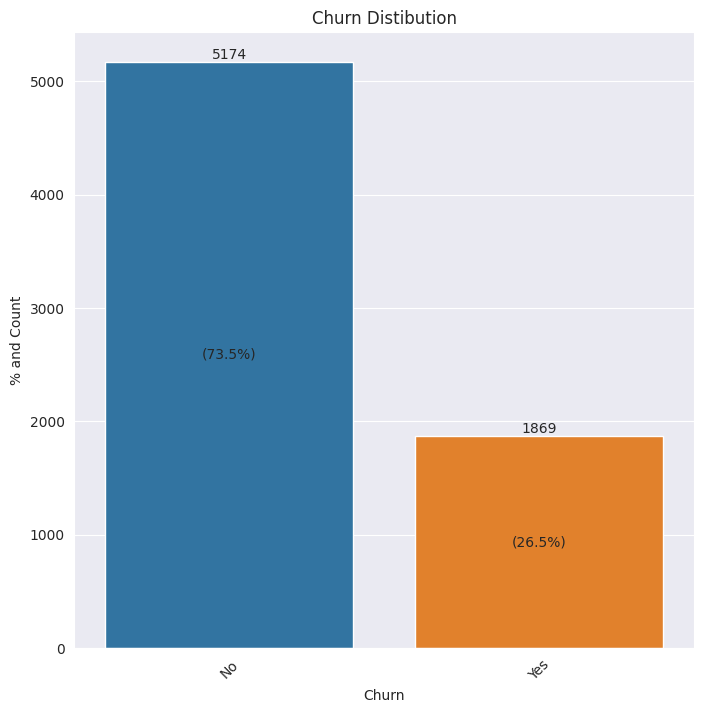

In [20]:
# analysis of Target var:
plot_CatVar_1("Churn")

##### Customer Information (categorical)

G1 = ['gender','SeniorCitizen', 'Partner', 'Dependents']

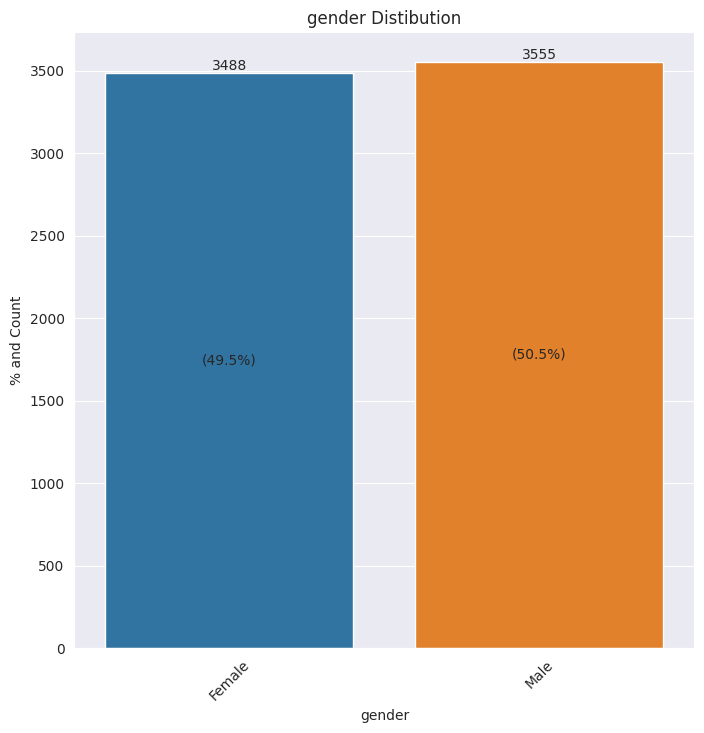

In [21]:
plot_CatVar_1("gender")

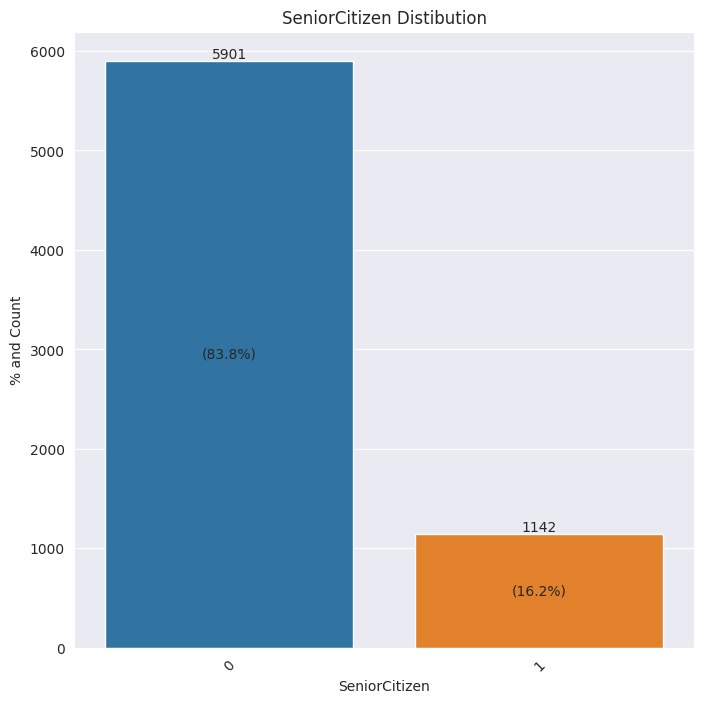

In [22]:
plot_CatVar_1("SeniorCitizen")

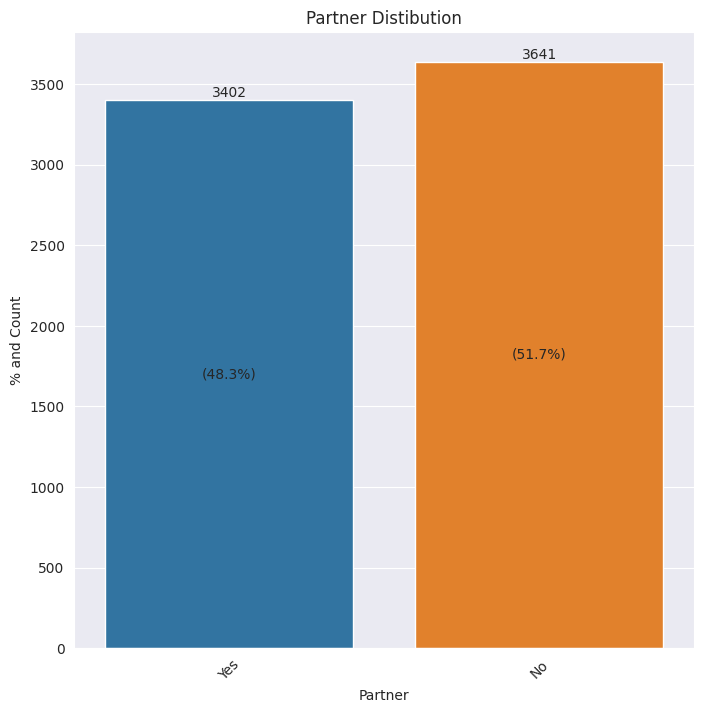

In [23]:
plot_CatVar_1("Partner")

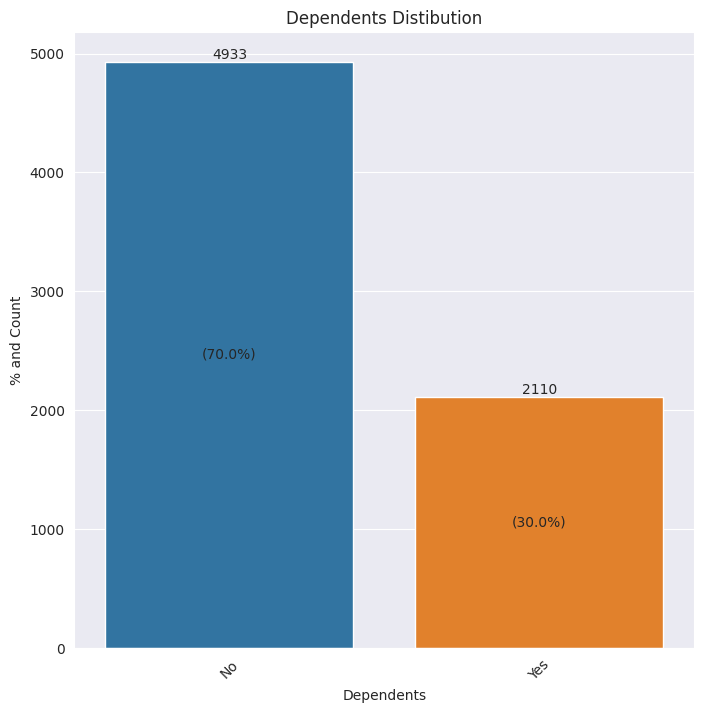

In [24]:
plot_CatVar_1('Dependents')

#### Services(categorical): 

G2= ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']

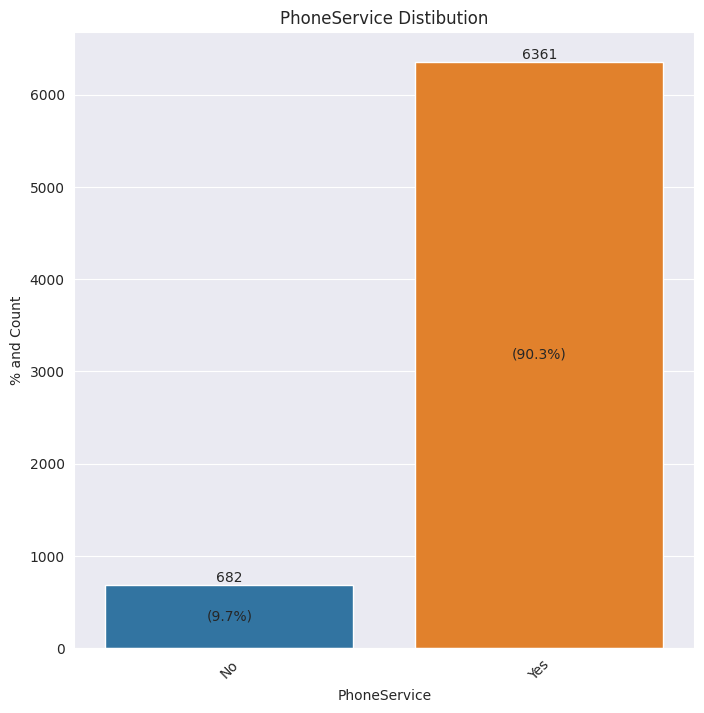

In [25]:
plot_CatVar_1('PhoneService')

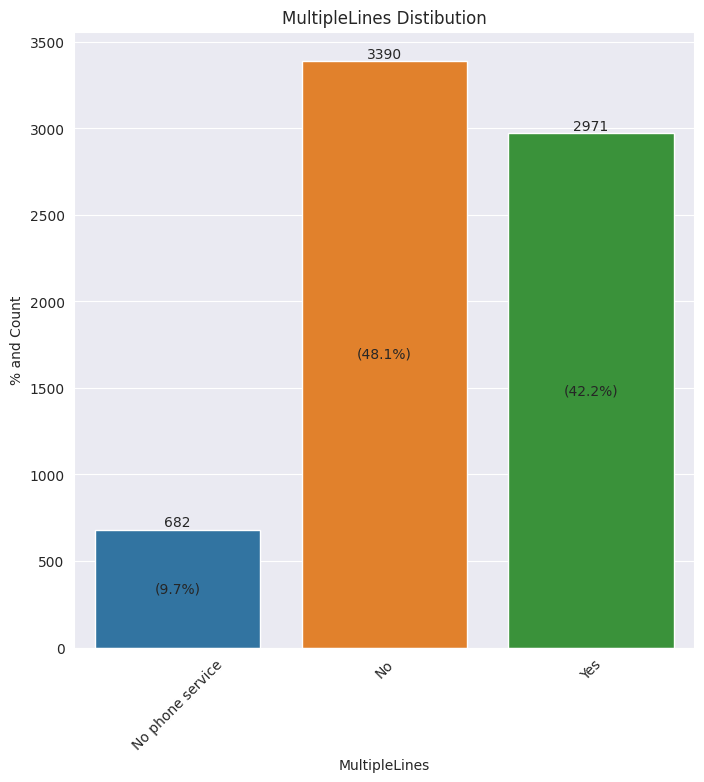

In [26]:
plot_CatVar_1('MultipleLines')

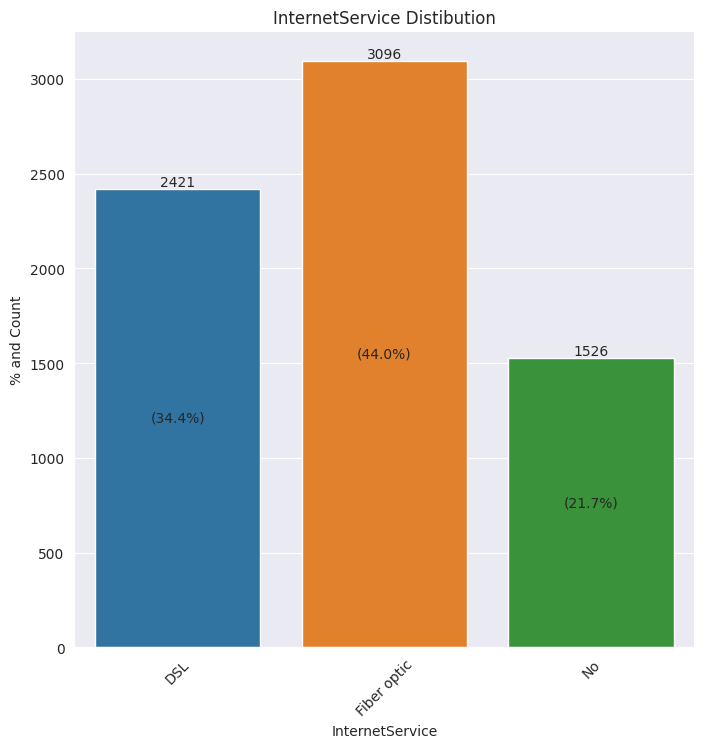

In [27]:
plot_CatVar_1('InternetService')

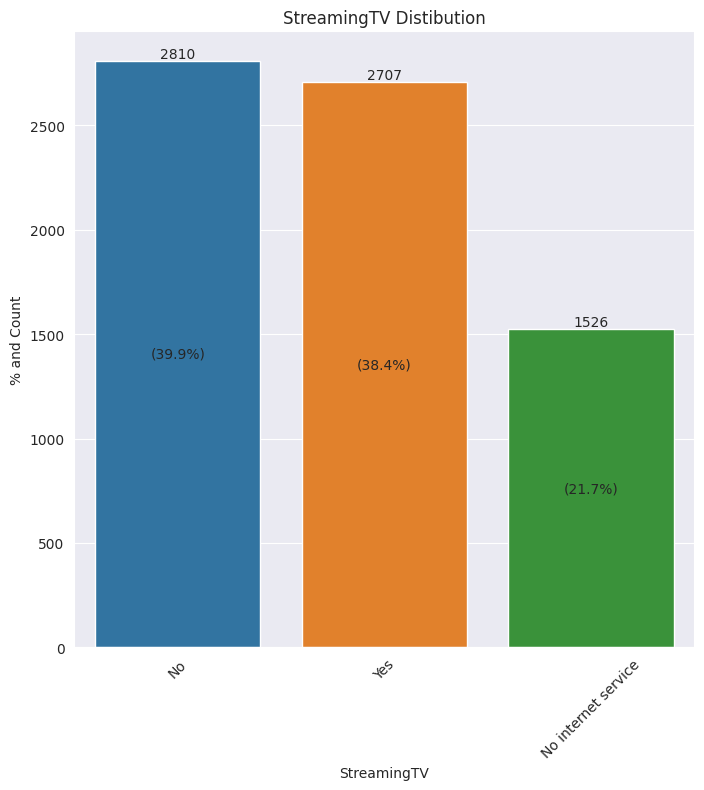

In [28]:
plot_CatVar_1('StreamingTV')

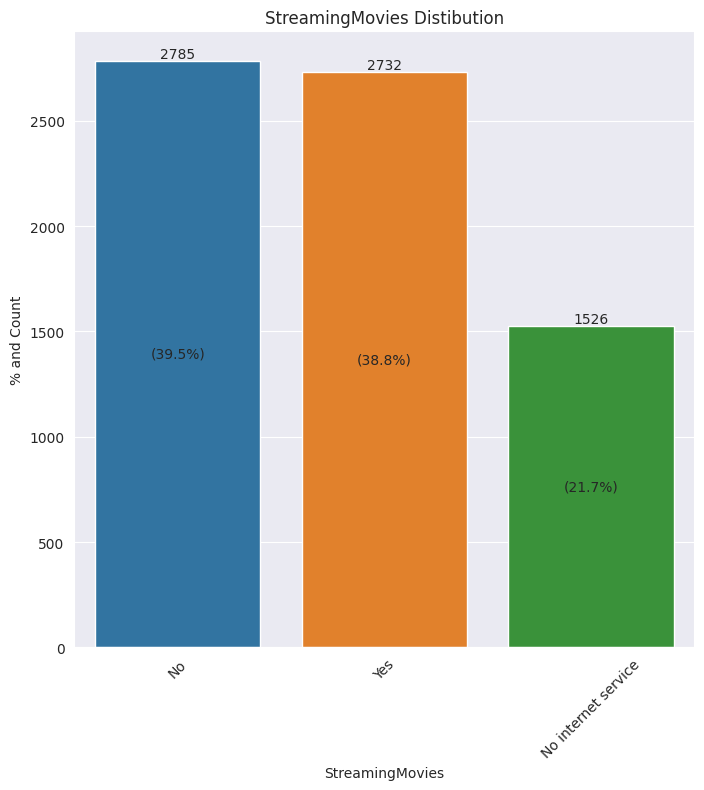

In [29]:
plot_CatVar_1('StreamingMovies')

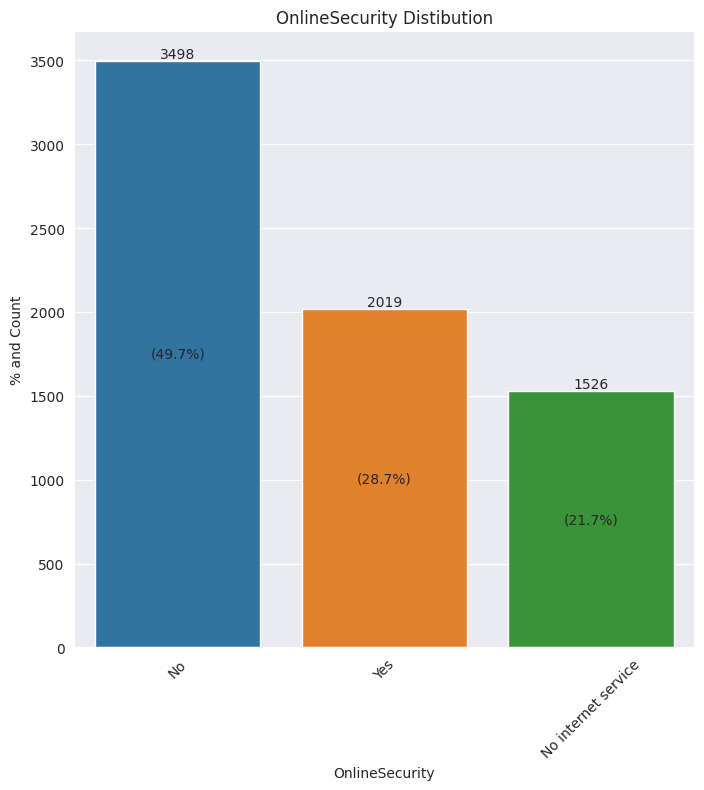

In [30]:
plot_CatVar_1('OnlineSecurity')

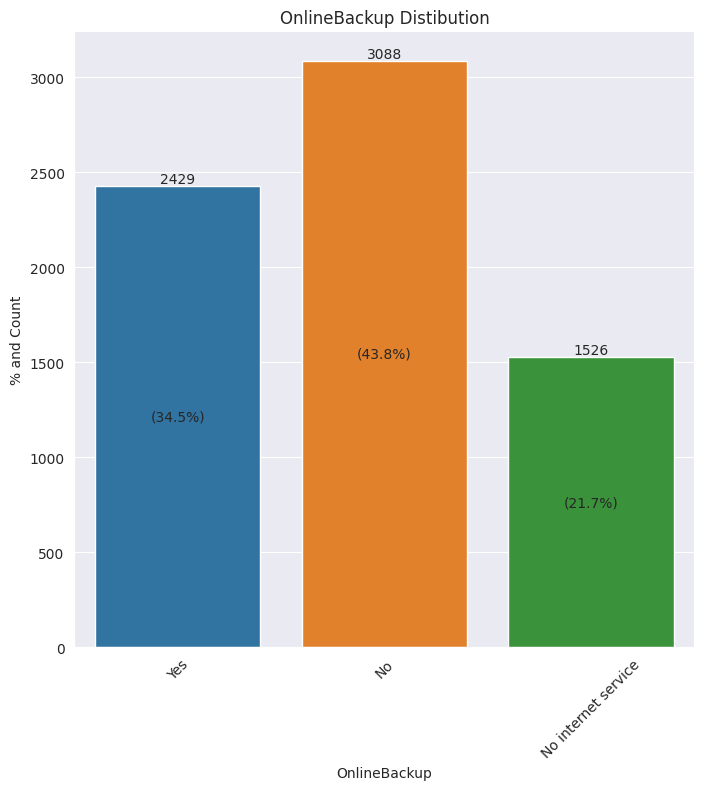

In [31]:
plot_CatVar_1('OnlineBackup')

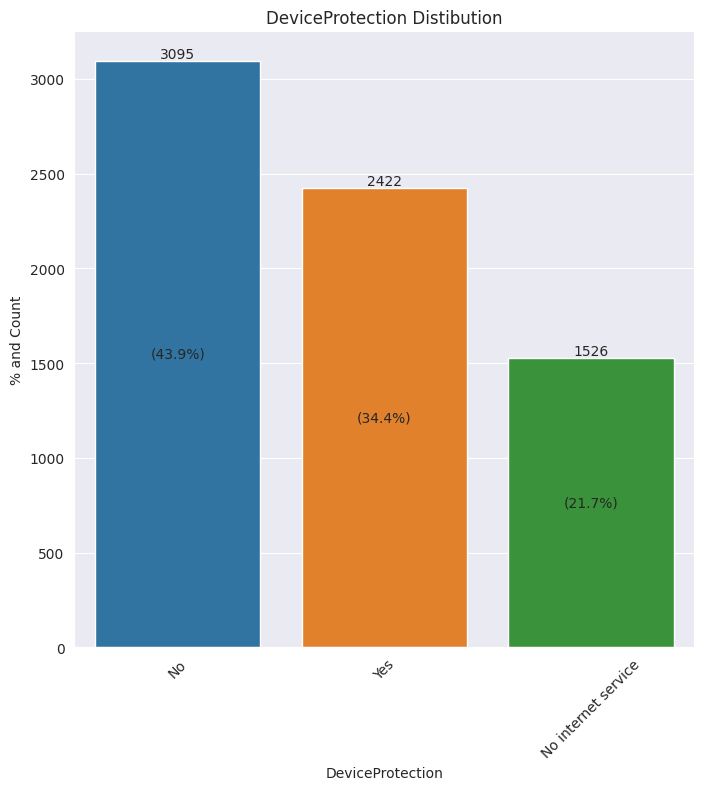

In [32]:
plot_CatVar_1('DeviceProtection')

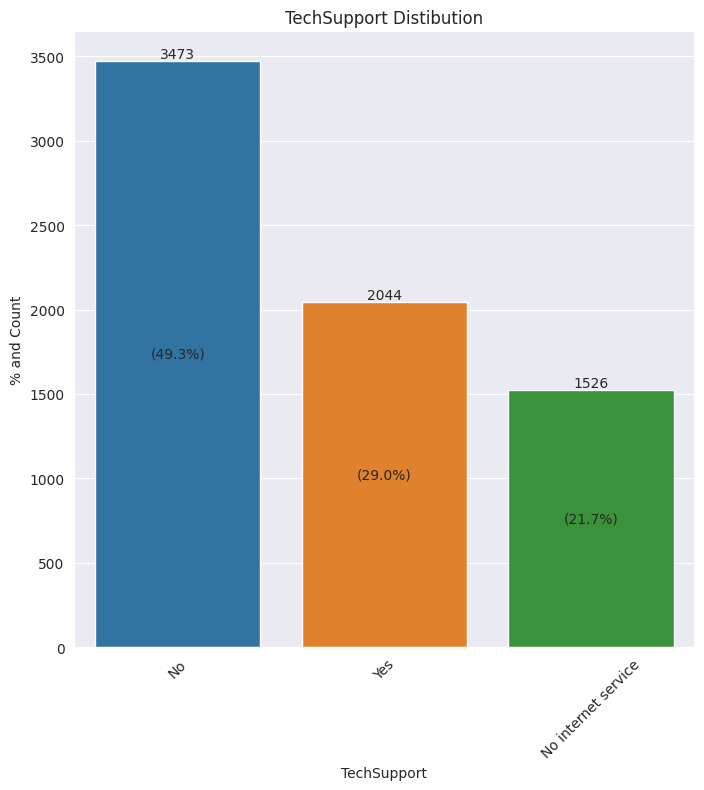

In [33]:
plot_CatVar_1('TechSupport')

#### payment information(categorical)

G3 = ['Contract','PaperlessBilling','PaymentMethod']

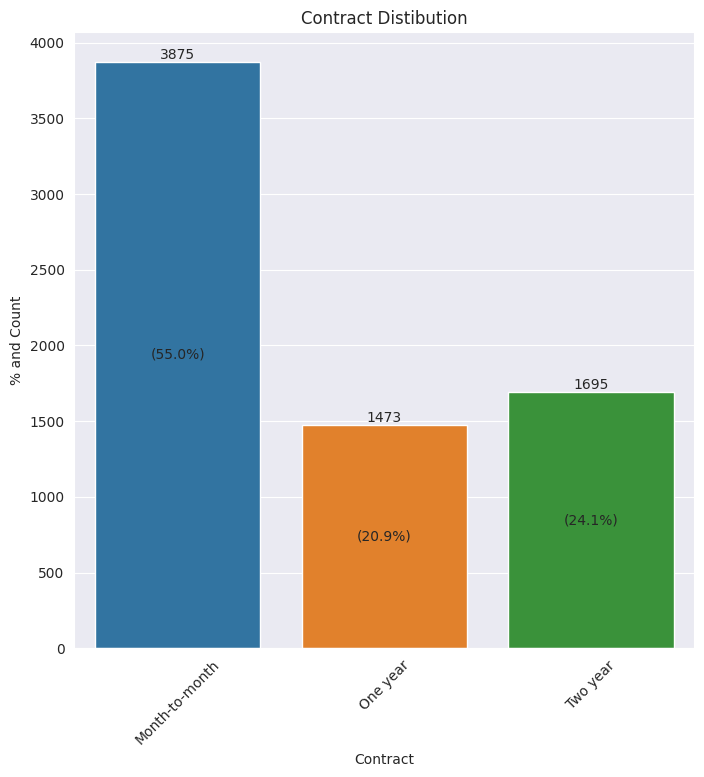

In [34]:
plot_CatVar_1('Contract')

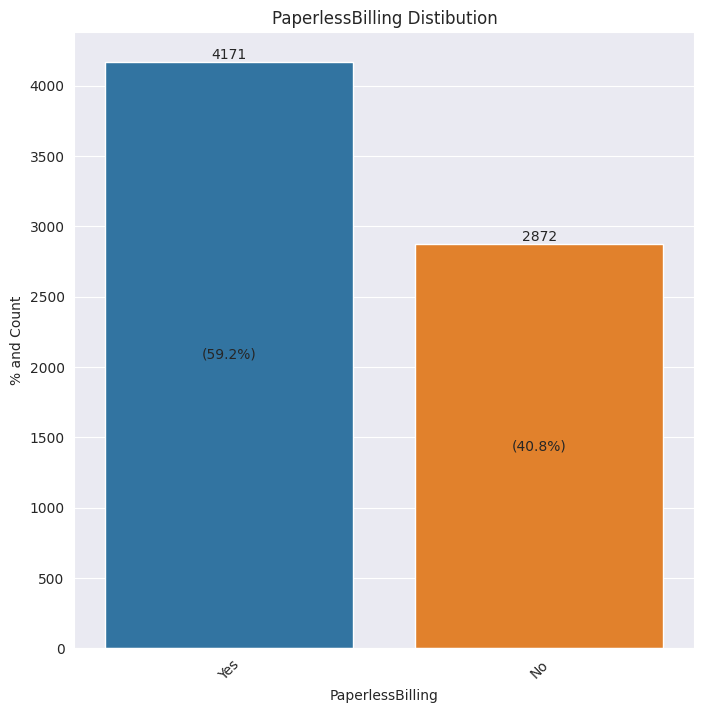

In [35]:
plot_CatVar_1('PaperlessBilling')

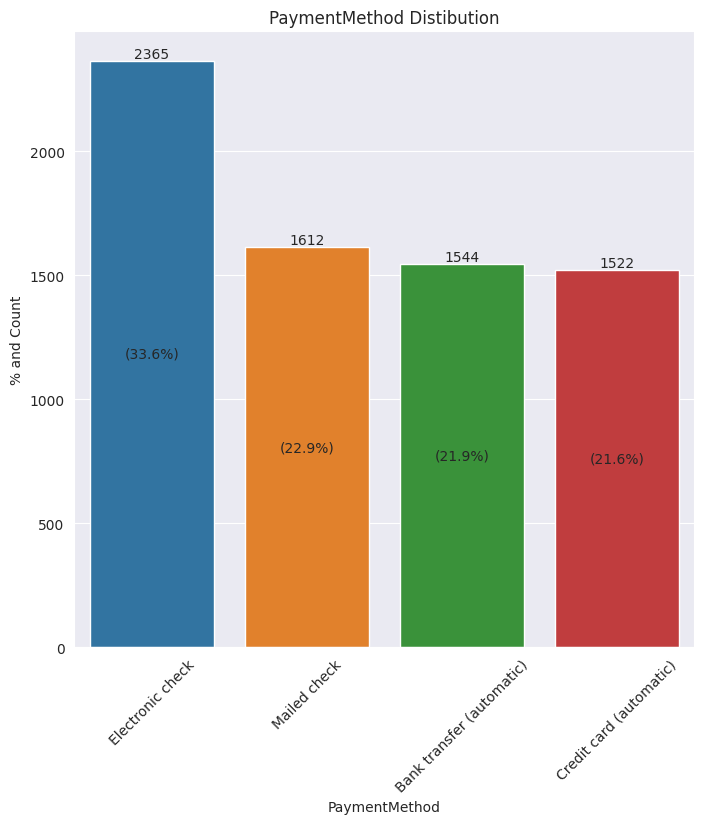

In [36]:
plot_CatVar_1('PaymentMethod')

### Analysis between Two categorical var with respect to Target var (Churn):

#### Customer Information (categorical)

G1 = ['gender','SeniorCitizen', 'Partner', 'Dependents']

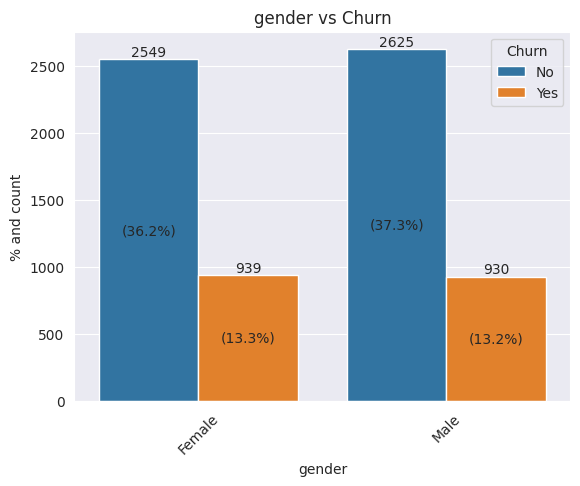

In [37]:
plot_CatVar_2('gender',"Churn")

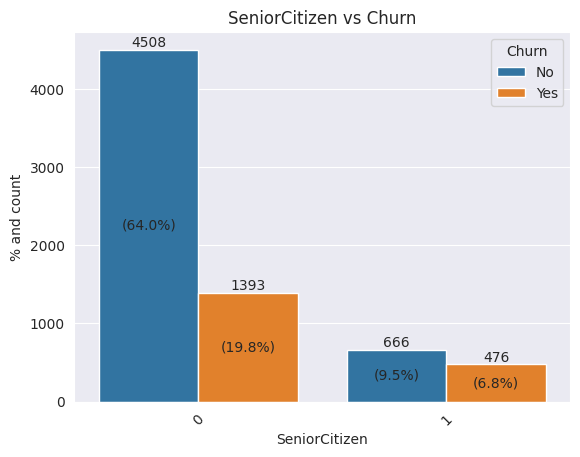

In [38]:
plot_CatVar_2('SeniorCitizen',"Churn")

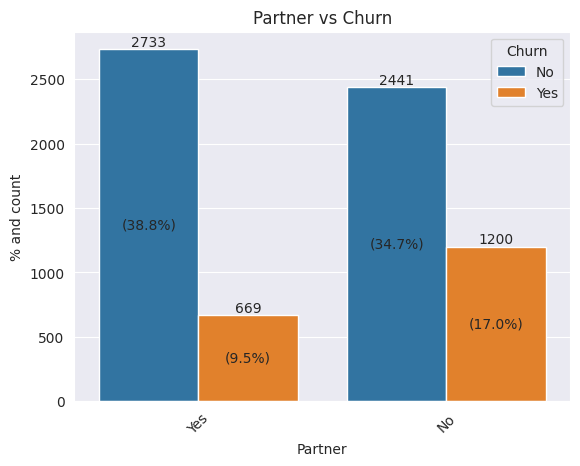

In [39]:
plot_CatVar_2('Partner', "Churn")

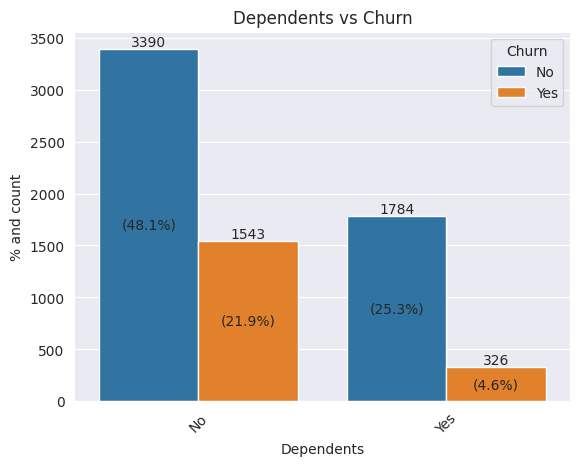

In [40]:
plot_CatVar_2('Dependents',"Churn")

#### Services(categorical): 

G2= ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']

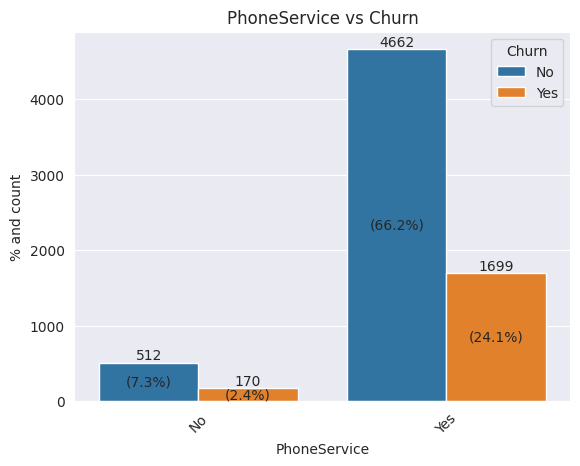

In [41]:
plot_CatVar_2('PhoneService',"Churn")

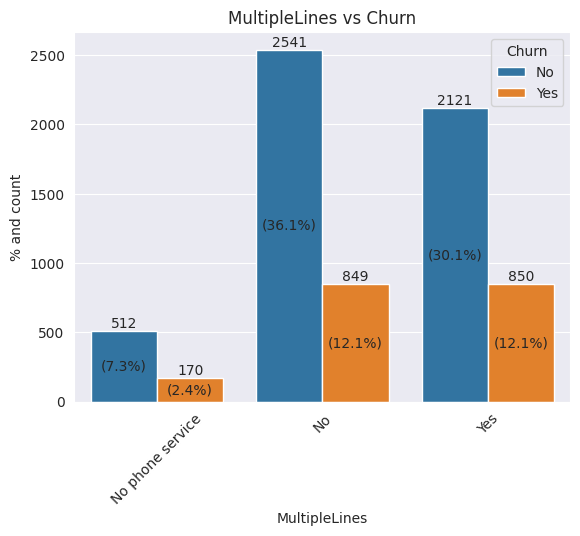

In [42]:
plot_CatVar_2('MultipleLines',"Churn")

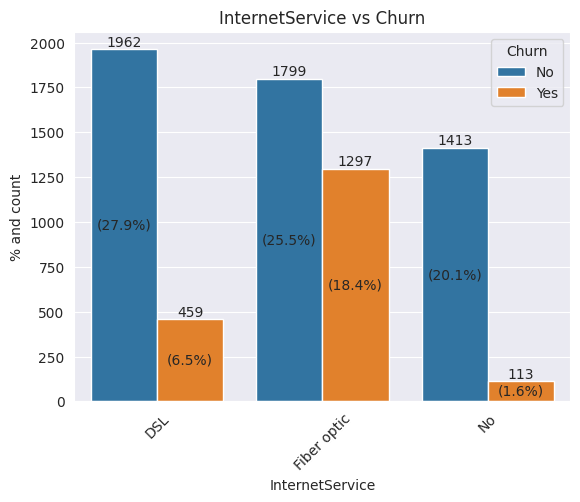

In [43]:
plot_CatVar_2('InternetService',"Churn")

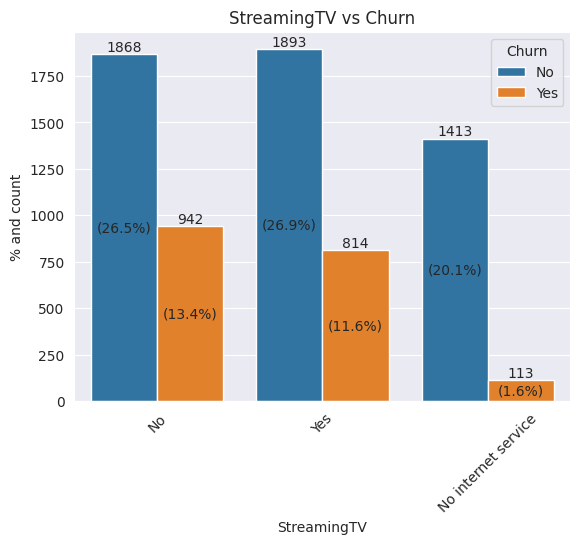

In [44]:
plot_CatVar_2('StreamingTV',"Churn")

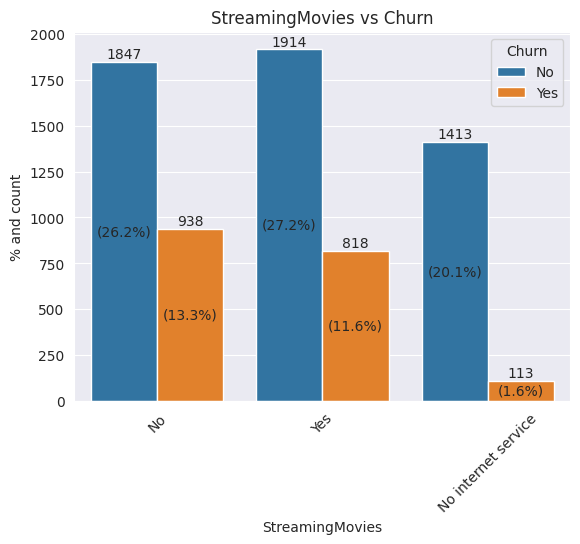

In [45]:
plot_CatVar_2('StreamingMovies',"Churn")

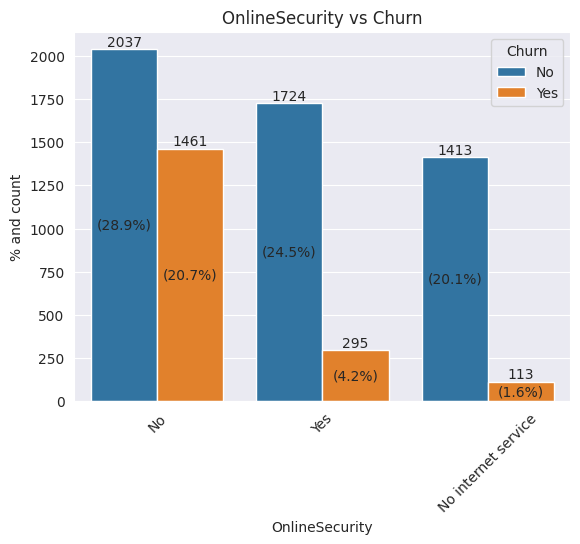

In [46]:
plot_CatVar_2('OnlineSecurity',"Churn")

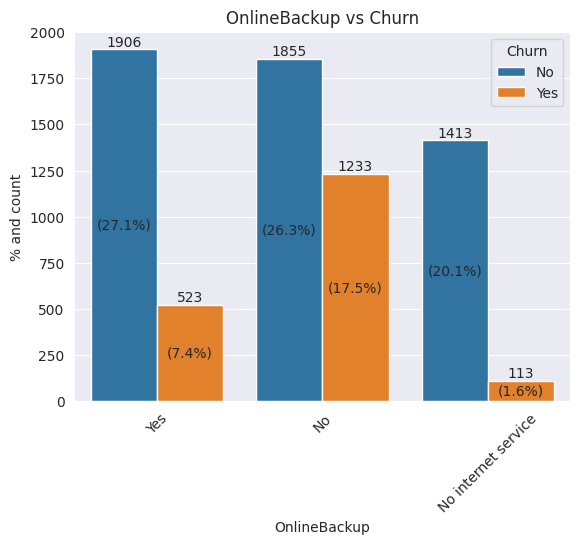

In [47]:
plot_CatVar_2('OnlineBackup',"Churn")

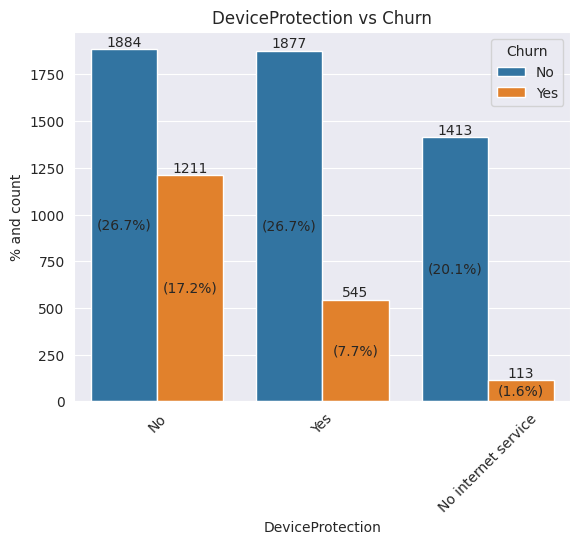

In [48]:
plot_CatVar_2('DeviceProtection',"Churn")

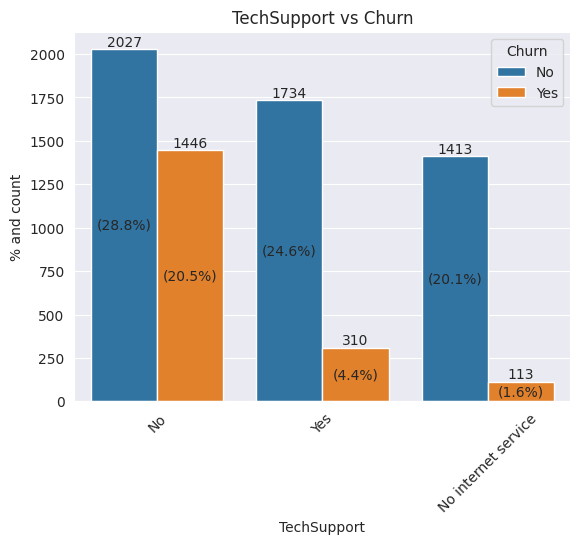

In [49]:
plot_CatVar_2('TechSupport',"Churn")

* #### payment information(categorical)

G3 = ['Contract','PaperlessBilling','PaymentMethod']

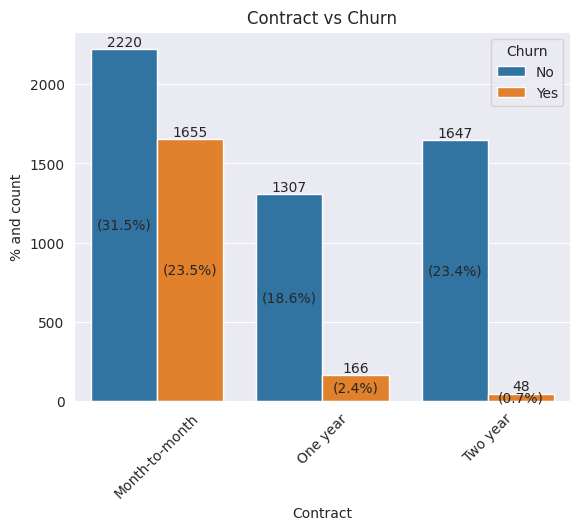

In [50]:
plot_CatVar_2('Contract',"Churn")

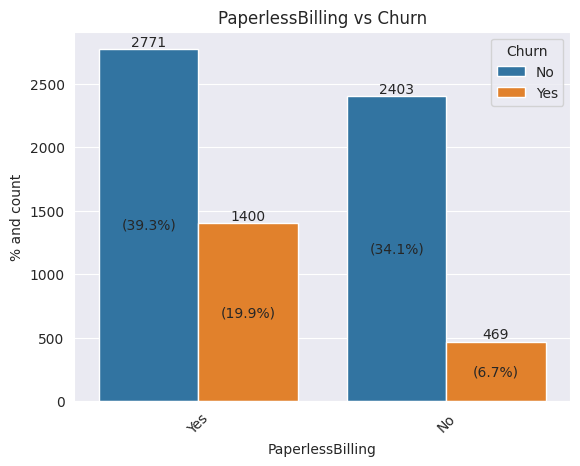

In [51]:
plot_CatVar_2('PaperlessBilling',"Churn")

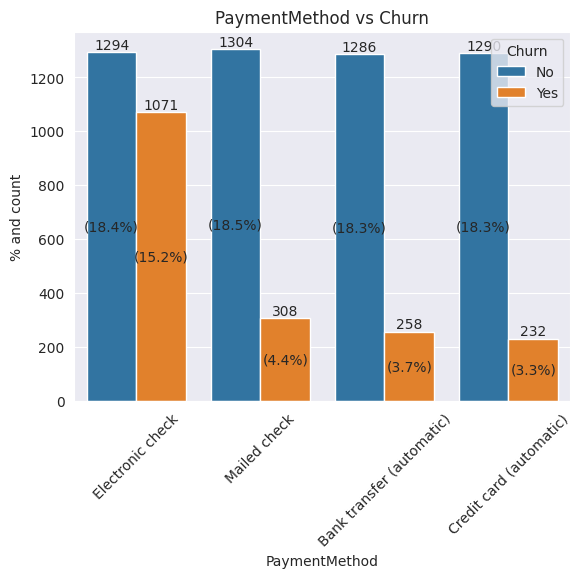

In [52]:
plot_CatVar_2('PaymentMethod',"Churn")